In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
from sklearn import mixture
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Data Preprocessing

In [153]:
df_full = pd.read_csv("DATA/FULL_DATABASE.txt", delimiter=r"\s+")
df_full.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
0,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,1.0,Rest,pre,1-day,0.000000,0.000000,0.0,0.0,NaN,10.0,-1.049409,NaN
1,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,2.0,Valued,pre,1-day,4.503729,0.171418,3.0,91.0,5.0,10.0,1.173591,0.812106
2,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,3.0,Rest,pre,1-day,0.000000,0.000000,0.0,0.0,NaN,10.0,-1.049409,NaN
3,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,4.0,Valued,pre,1-day,4.171794,0.202048,2.0,167.0,5.0,10.0,1.009751,0.812106
4,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,5.0,Devalued,pre,1-day,3.836949,0.108135,0.0,77.0,5.0,10.0,0.844474,0.812106


- We are interested in cue of valued or devalues. When Cue is Rest the pressFreq is just 0

In [154]:
df_full = df_full.loc[df_full['cue'] != 'Rest']
df_full.head(100)

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
1,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,2.0,Valued,pre,1-day,4.503729,0.171418,3.0,91.0,5.0,10.0,1.173591,0.812106
3,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,4.0,Valued,pre,1-day,4.171794,0.202048,2.0,167.0,5.0,10.0,1.009751,0.812106
4,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,5.0,Devalued,pre,1-day,3.836949,0.108135,0.0,77.0,5.0,10.0,0.844474,0.812106
5,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,6.0,Valued,pre,1-day,3.859719,0.064487,0.0,77.0,5.0,10.0,0.855713,0.812106
7,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,8.0,Valued,pre,1-day,4.609693,0.115511,1.0,93.0,5.0,10.0,1.225894,0.812106
8,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,9.0,Devalued,pre,1-day,4.057902,0.066395,0.0,81.0,5.0,10.0,0.953535,0.812106
10,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,11.0,Devalued,pre,1-day,3.922764,0.134825,3.0,157.0,5.0,10.0,0.886832,0.812106
11,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,12.0,Valued,pre,1-day,3.268415,0.133017,3.0,131.0,5.0,10.0,0.563851,0.812106
13,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,14.0,Devalued,pre,1-day,3.988820,0.160086,2.0,80.0,5.0,10.0,0.919436,0.812106
15,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.167910,-1.849701,-1.167910,NaN,NaN,Caltech1,1.0,1.0,16.0,Devalued,pre,1-day,4.133767,0.145825,2.0,83.0,5.0,10.0,0.990981,0.812106


- Split into two groups. 1 day training group and 3 day training group

In [155]:
df_group_day_1 = df_full.loc[df_full['group'] == '1-day']
df_group_day_3 = df_full.loc[df_full['group'] == '3-day']

In [156]:
df_group_day_1.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
1,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,2.0,Valued,pre,1-day,4.503729,0.171418,3.0,91.0,5.0,10.0,1.173591,0.812106
3,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,4.0,Valued,pre,1-day,4.171794,0.202048,2.0,167.0,5.0,10.0,1.009751,0.812106
4,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,5.0,Devalued,pre,1-day,3.836949,0.108135,0.0,77.0,5.0,10.0,0.844474,0.812106
5,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,6.0,Valued,pre,1-day,3.859719,0.064487,0.0,77.0,5.0,10.0,0.855713,0.812106
7,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,1.0,8.0,Valued,pre,1-day,4.609693,0.115511,1.0,93.0,5.0,10.0,1.225894,0.812106


In [157]:
df_group_day_3.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
735,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,1.0,1.0,1.0,Valued,pre,3-day,2.080476,0.216031,3.0,41.0,3.0,8.0,-0.022505,-0.352069
736,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,1.0,1.0,2.0,Devalued,pre,3-day,2.554356,0.090883,0.0,51.0,4.0,8.0,0.211398,0.230019
737,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,1.0,1.0,3.0,Valued,pre,3-day,2.547211,0.163206,2.0,51.0,3.0,8.0,0.207871,-0.352069
738,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,1.0,1.0,4.0,Devalued,pre,3-day,2.544660,0.128796,1.0,52.0,4.0,8.0,0.206612,0.230019
740,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,1.0,1.0,6.0,Devalued,pre,3-day,2.520280,0.159087,4.0,101.0,4.0,8.0,0.194578,0.230019


- Just need the last days run before and after devaluation (pre and post)
- So for group_day_1 just run 2 and 3. 
- For group_day_3 on session = 3 (Last day) get run 4 and 5.

In [158]:
df_c_group_day_1 = df_group_day_1.loc[df_group_day_1['run'].isin([2,3])]
df_group_day_3 = df_group_day_3.loc[df_group_day_3['session'] == 3]
df_c_group_day_3 = df_group_day_3.loc[df_group_day_3['run'].isin([4,5])]

In [159]:
df_c_group_day_3.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
956,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,3.0,4.0,2.0,Devalued,pre,3-day,1.768303,0.152358,2.0,36.0,4.0,9.0,-0.176591,0.230019
957,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,3.0,4.0,3.0,Valued,pre,3-day,1.781921,0.131519,0.0,35.0,5.0,9.0,-0.169869,0.812106
958,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,3.0,4.0,4.0,Devalued,pre,3-day,1.808197,0.152916,2.0,36.0,4.0,9.0,-0.156899,0.230019
959,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,3.0,4.0,5.0,Valued,pre,3-day,1.867046,0.149873,4.0,75.0,5.0,9.0,-0.127852,0.812106
960,84,-0.229923,-0.825353,-0.853525,-0.723324,0.837173,-0.518677,0.993215,-1.182039,-0.762253,0.991267,0.04387,0.846587,-0.995241,-0.386951,0.09472,0.655747,0.09472,NaN,NaN,Caltech1,3.0,4.0,6.0,Devalued,pre,3-day,1.783954,0.196260,4.0,36.0,4.0,9.0,-0.168865,0.230019


In [160]:
df_change = pd.concat([df_c_group_day_1,df_c_group_day_3])
df_change.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking
20,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,1.0,Valued,pre,1-day,4.325470,0.105406,1.0,83.0,5.0,10.0,1.085604,0.812106
21,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,2.0,Devalued,pre,1-day,4.062934,0.123620,3.0,162.0,5.0,10.0,0.956018,0.812106
23,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,4.0,Valued,pre,1-day,3.900191,0.200145,4.0,78.0,5.0,10.0,0.875690,0.812106
24,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,5.0,Devalued,pre,1-day,3.581422,0.195008,4.0,72.0,5.0,10.0,0.718348,0.812106
25,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,6.0,Valued,pre,1-day,3.896736,0.104941,2.0,156.0,5.0,10.0,0.873985,0.812106


- Calc the behavioral index: 
- change_behaviour = mean(change in norm press freq in valued) - mean(change in norm press freq in devalued)

# Calculating variables of interest like 
- Change in behaviour defined above
- Change in liking (similar formula as behave use liking instead of press frequency)

In [161]:
# This cell calculates the BAI index defined above. Saving the result in a new data frame with index and change in press freq
groups = df_change[['ID','prepost','cue','normPressFreq','normLiking']].groupby(['ID','prepost','cue']).mean().reset_index()
ids = groups.ID.unique()
data = []
for i in ids:
    BAI = ((groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'post') & (groups['cue'] == 'Valued') ]['normPressFreq'].iloc[0])- 
     (groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'pre') & (groups['cue'] == 'Valued') ]['normPressFreq'].iloc[0]))-\
((groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'post') & (groups['cue'] == 'Devalued') ]['normPressFreq'].iloc[0])- 
     (groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'pre') & (groups['cue'] == 'Devalued') ]['normPressFreq'].iloc[0]))
    Liking = ((groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'post') & (groups['cue'] == 'Valued') ]['normLiking'].iloc[0])- 
     (groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'pre') & (groups['cue'] == 'Valued') ]['normLiking'].iloc[0]))-\
((groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'post') & (groups['cue'] == 'Devalued') ]['normLiking'].iloc[0])- 
     (groups.loc[(groups['ID'] == i) & (groups['prepost'] == 'pre') & (groups['cue'] == 'Devalued') ]['normLiking'].iloc[0]))
    data.append([i,BAI,Liking])
df_change_behav_liking = pd.DataFrame(data, columns = ['ID', 'normChangeBehav','normChangeLiking'])

In [162]:
df_change_behav_liking.head()

,ID,normChangeBehav,normChangeLiking
0,51,0.233570,0.582088
1,52,0.126632,2.910439
2,53,0.127165,1.164176
3,54,0.844816,2.910439
4,55,-0.337246,-1.746263


In [163]:
df_change = pd.merge(df_change, df_change_behav_liking, on='ID')

- Making datasets for each site

In [164]:
df_c_caltech1 = df_change.loc[df_change['site']=='Caltech1']
df_c_caltech2 = df_change.loc[df_change['site']=='Caltech2']
df_c_hamburg = df_change.loc[df_change['site']=='Hamburg']
df_c_sydney = df_change.loc[df_change['site']=='Sydney']
df_c_telaviv = df_change.loc[df_change['site']=='Tel_Aviv']

# Manipulation checks

### Hunger

In [165]:
df_hunger = df_change[['ID','group','prepost','site','hunger']].groupby(['ID','group','prepost','site']).mean().reset_index()
df_hunger = df_hunger.loc[df_hunger['ID']!=115] # Drop 115 because was measured in wrong scale mentioned in paper implementation

In [166]:
df_hunger.head()

,ID,group,prepost,site,hunger
0,51,1-day,post,Caltech1,4.0
1,51,1-day,pre,Caltech1,9.0
2,52,1-day,post,Caltech1,2.0
3,52,1-day,pre,Caltech1,10.0
4,53,1-day,post,Caltech1,6.0


- Caltech1

In [167]:
df_hung_cal1 = df_hunger.loc[df_hunger['site']=='Caltech1']

In [168]:
df_hung_cal1.head()

,ID,group,prepost,site,hunger
0,51,1-day,post,Caltech1,4.0
1,51,1-day,pre,Caltech1,9.0
2,52,1-day,post,Caltech1,2.0
3,52,1-day,pre,Caltech1,10.0
4,53,1-day,post,Caltech1,6.0


In [169]:
# from statsmodels.stats.anova import AnovaRM
# print(AnovaRM(data=df_hung_cal1, depvar='hunger', subject='ID', within=['prepost']).fit())

pg.mixed_anova(dv='hunger', between='group', within='prepost', subject='ID', data=df_hung_cal1)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,7.258065,1,60,7.258065,2.161383,1.467420e-01,0.034771,NaN
1,prepost,464.516129,1,60,464.516129,197.802198,1.181467e-20,0.767263,1.0
2,Interaction,1.580645,1,60,1.580645,0.673077,4.152284e-01,0.011094,NaN


- The interaction is not significant. We can see the hunger is mainly effected by prepost column.
- F statistic is 198 and P value is 0. There fore reject the null hypothesis. That is there is a diff between hunger level pre and post devaluation phase

### Liking

In [170]:
df_liking = df_change[['ID','prepost','cue','group','site','outcomeliking']].groupby(['ID','prepost','cue','group','site']).mean().reset_index()

In [171]:
ids = df_liking.ID.unique()
data = []
for i in ids:
    curr_group = df_liking.loc[df_liking['ID'] == i].iloc[0]['group']
    curr_site = df_liking.loc[df_liking['ID'] == i].iloc[0]['site']
    liking_index_1 = ((df_liking.loc[(df_liking['ID'] == i) & (df_liking['prepost'] == 'post') & (df_liking['cue'] == 'Valued') ]['outcomeliking'].iloc[0])- 
     (df_liking.loc[(df_liking['ID'] == i) & (df_liking['prepost'] == 'post') & (df_liking['cue'] == 'Devalued') ]['outcomeliking'].iloc[0]))
    liking_index_2 = ((df_liking.loc[(df_liking['ID'] == i) & (df_liking['prepost'] == 'pre') & (df_liking['cue'] == 'Valued') ]['outcomeliking'].iloc[0])-
                      (df_liking.loc[(df_liking['ID'] == i) & (df_liking['prepost'] == 'pre') & (df_liking['cue'] == 'Devalued') ]['outcomeliking'].iloc[0]))
    data.append([i,'post',curr_group,curr_site,liking_index_1])
    data.append([i,'pre',curr_group,curr_site,liking_index_2])
                      
df_change_behav_liking = pd.DataFrame(data, columns = ['ID', 'prepost','group','site','outcomeliking'])

In [172]:
df_change_behav_liking.head(10)

,ID,prepost,group,site,outcomeliking
0,51,post,1-day,Caltech1,-1.0
1,51,pre,1-day,Caltech1,-2.0
2,52,post,1-day,Caltech1,5.0
3,52,pre,1-day,Caltech1,0.0
4,53,post,1-day,Caltech1,6.0
5,53,pre,1-day,Caltech1,4.0
6,54,post,1-day,Caltech1,4.0
7,54,pre,1-day,Caltech1,-1.0
8,55,post,1-day,Caltech1,-4.0
9,55,pre,1-day,Caltech1,-1.0


In [173]:
liking_cal1 = df_change_behav_liking.loc[df_change_behav_liking['site'] == 'Caltech1']

model1 = pg.mixed_anova(dv='outcomeliking', between='group', within='prepost', subject='ID', data=liking_cal1)
model1

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,1.362903,1,60,1.362903,0.189703,6.647269e-01,0.003152,NaN
1,prepost,592.266129,1,60,592.266129,173.838567,2.239274e-19,0.743413,1.0
2,Interaction,1.814516,1,60,1.814516,0.532586,4.683612e-01,0.008798,NaN


# OUTCOME DEVALUATION CHANGES BY SITE

In [174]:
df_c_caltech1.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking,normChangeBehav,normChangeLiking
0,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,1.0,Valued,pre,1-day,4.325470,0.105406,1.0,83.0,5.0,10.0,1.085604,0.812106,0.126632,2.910439
1,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,2.0,Devalued,pre,1-day,4.062934,0.123620,3.0,162.0,5.0,10.0,0.956018,0.812106,0.126632,2.910439
2,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,4.0,Valued,pre,1-day,3.900191,0.200145,4.0,78.0,5.0,10.0,0.875690,0.812106,0.126632,2.910439
3,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,5.0,Devalued,pre,1-day,3.581422,0.195008,4.0,72.0,5.0,10.0,0.718348,0.812106,0.126632,2.910439
4,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,6.0,Valued,pre,1-day,3.896736,0.104941,2.0,156.0,5.0,10.0,0.873985,0.812106,0.126632,2.910439


In [175]:
df_c_caltech_index = df_c_caltech1[['ID','prepost','cue','group','pressFreq']].groupby(['ID','prepost','cue','group']).mean().reset_index()

In [176]:
df_c_caltech_index.head()

,ID,prepost,cue,group,pressFreq
0,51,post,Devalued,1-day,5.349233
1,51,post,Valued,1-day,5.729813
2,51,pre,Devalued,1-day,4.969821
3,51,pre,Valued,1-day,4.877195
4,52,post,Devalued,1-day,4.593628


In [177]:
ids = df_c_caltech_index.ID.unique()
data = []
for i in ids:
    curr_group = df_c_caltech_index.loc[df_c_caltech_index['ID'] == i].iloc[0]['group']
    change_press_freq_val = ((df_c_caltech_index.loc[(df_c_caltech_index['ID'] == i) & (df_c_caltech_index['prepost'] == 'post') & (df_c_caltech_index['cue'] == 'Valued') ]['pressFreq'].iloc[0])- 
     (df_c_caltech_index.loc[(df_c_caltech_index['ID'] == i) & (df_c_caltech_index['prepost'] == 'pre') & (df_c_caltech_index['cue'] == 'Valued') ]['pressFreq'].iloc[0]))
    change_press_freq_deval = ((df_c_caltech_index.loc[(df_c_caltech_index['ID'] == i) & (df_c_caltech_index['prepost'] == 'post') & (df_c_caltech_index['cue'] == 'Devalued') ]['pressFreq'].iloc[0])- 
     (df_c_caltech_index.loc[(df_c_caltech_index['ID'] == i) & (df_c_caltech_index['prepost'] == 'pre') & (df_c_caltech_index['cue'] == 'Devalued') ]['pressFreq'].iloc[0]))
    data.append([i,"Valued",curr_group,change_press_freq_val])
    data.append([i,"Devalued",curr_group,change_press_freq_deval])
df_cal1_change_press_freq = pd.DataFrame(data, columns = ['ID', 'cue','group','change_press_freq'])

In [178]:
df_cal1_change_press_freq.head()

,ID,cue,group,change_press_freq
0,51,Valued,1-day,0.852618
1,51,Devalued,1-day,0.379412
2,52,Valued,1-day,0.770893
3,52,Devalued,1-day,0.514341
4,53,Valued,1-day,0.121788


In [179]:
pg.mixed_anova(dv='change_press_freq', between='group', within='cue', subject='ID', data=df_cal1_change_press_freq)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,6.026916,1,60,6.026916,2.440675,0.123485,0.039088,NaN
1,cue,11.450734,1,60,11.450734,9.890250,0.002584,0.141511,1.0
2,Interaction,0.842076,1,60,0.842076,0.727319,0.397145,0.011977,NaN


- The interaction is not significant. That means the group (1 day or 3 day) does not have any effect in the change in press frequency.
- As cue has an significant effect (p<0.05) it denotes a goal based behaviour.

# Cluster analysis

In [180]:
df_change.head()

,ID,BIS_attentional,BIS_motor,BIS_nonplanning,BIS_total,TICS_WOOV,TICS_SOOV,TICS_PREPE,TICS_WODI,TICS_EXWO,TICS_LACK,TICS_SOTE,TICS_SOIS,TICS_WORY,TICS_CSSS,STAIT_total,OCIR_total,ANXIETY,STAIS_total,BDI_total,site,session,run,trial,cue,prepost,group,pressFreq,pressVar,nRewards,nResponse,outcomeliking,hunger,normPressFreq,normLiking,normChangeBehav,normChangeLiking
0,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,1.0,Valued,pre,1-day,4.325470,0.105406,1.0,83.0,5.0,10.0,1.085604,0.812106,0.126632,2.910439
1,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,2.0,Devalued,pre,1-day,4.062934,0.123620,3.0,162.0,5.0,10.0,0.956018,0.812106,0.126632,2.910439
2,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,4.0,Valued,pre,1-day,3.900191,0.200145,4.0,78.0,5.0,10.0,0.875690,0.812106,0.126632,2.910439
3,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,5.0,Devalued,pre,1-day,3.581422,0.195008,4.0,72.0,5.0,10.0,0.718348,0.812106,0.126632,2.910439
4,52,-1.215307,-0.589538,-1.070522,-1.179723,-1.475018,-1.619285,-1.941958,-1.611871,-1.324253,-1.732109,-1.228373,-1.573936,-1.484131,-1.778555,-1.16791,-1.849701,-1.16791,NaN,NaN,Caltech1,1.0,2.0,6.0,Valued,pre,1-day,3.896736,0.104941,2.0,156.0,5.0,10.0,0.873985,0.812106,0.126632,2.910439


In [181]:
df_change_means = df_change[['ID','group','site','normChangeBehav']].groupby(['ID','group','site']).mean().reset_index()

In [182]:
df_change_means.head()

,ID,group,site,normChangeBehav
0,51,1-day,Caltech1,0.233570
1,52,1-day,Caltech1,0.126632
2,53,1-day,Caltech1,0.127165
3,54,1-day,Caltech1,0.844816
4,55,1-day,Caltech1,-0.337246


In [183]:
ids = df_change_means.ID.unique()
data = []
data_1 = []
data_3 = []
for i in ids:
    curr_group = df_change_means.loc[df_change_means['ID'] == i].iloc[0]['group']
    curr_behav = df_change_means.loc[df_change_means['ID'] == i].iloc[0]['normChangeBehav']
    if curr_group == '1-day':
        data.append([0,curr_behav])
        data_1.append(curr_behav)
    else:
        data.append([1,curr_behav])
        data_3.append(curr_behav)
X_1 = np.array(data_1).reshape(-1,1)
X_3 = np.array(data_3).reshape(-1,1)

In [184]:
lowest_bic_1 = np.infty
lowest_bic_3 = np.infty
bic_1 = []
bic_3 = []
n_components_range = range(1, 5)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm_1 = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm_1.fit(X_1)
        gmm_3 = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm_3.fit(X_3)
        bic_1.append(gmm_1.bic(X))
        bic_3.append(gmm_1.bic(X))
        if bic_1[-1] < lowest_bic_1:
            lowest_bic_1 = bic_1[-1]
            best_gmm_1 = gmm_1
        if bic_3[-1] < lowest_bic_3:
            lowest_bic_3 = bic_3[-1]
            best_gmm_3 = gmm_3

In [185]:
best_gmm_1

GaussianMixture(covariance_type='spherical', n_components=2)

In [186]:
best_gmm_3

GaussianMixture(covariance_type='spherical', n_components=2)

In [187]:
Y_1 = best_gmm_1.predict(X_1)
Y_3 = best_gmm_3.predict(X_3)

In [188]:
print(np.sum(Y_1))
print(np.sum(Y_3))
print(len(Y_1)-np.sum(Y_1))
print(len(Y_3)-np.sum(Y_3))

37
20
112
137


In [189]:
x_1 = [a[0] for a in X_1]
df_1 = pd.DataFrame(list(zip(x_1, Y_1)),
               columns =['Behav_index', 'group'])

x_3 = [a[0] for a in X_3]
df_3 = pd.DataFrame(list(zip(x_3, Y_3)),
               columns =['Behav_index', 'group'])

In [190]:
df_1.head()

,Behav_index,group
0,0.233570,0
1,0.126632,0
2,0.127165,0
3,0.844816,1
4,-0.337246,0


In [191]:
df_3.head()

,Behav_index,group
0,-0.451069,0
1,0.255837,0
2,0.102162,0
3,0.287661,0
4,0.093784,0


In [192]:
day_1_group_1 = df_1.loc[df_1['group'] == 1]['Behav_index'].to_list()
day_1_group_0 = df_1.loc[df_1['group'] == 0]['Behav_index'].to_list()
day_3_group_1 = df_3.loc[df_3['group'] == 1]['Behav_index'].to_list()
day_3_group_0 = df_3.loc[df_3['group'] == 0]['Behav_index'].to_list()

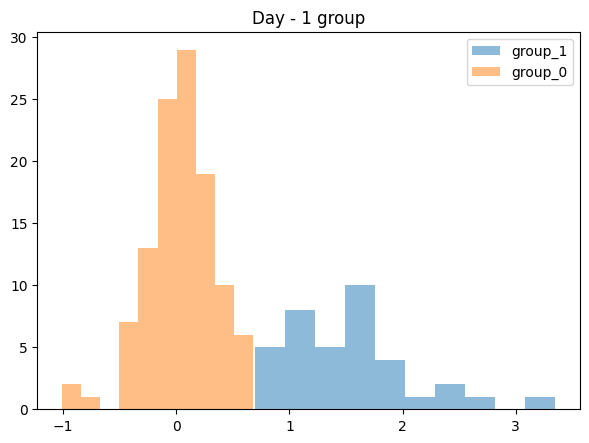

In [195]:
bins = numpy.linspace(-2, 3, 500)
pyplot.title("Day - 1 group")
pyplot.hist(day_1_group_1, alpha=0.5, label='group_1')
pyplot.hist(day_1_group_0, alpha=0.5, label='group_0')
pyplot.legend(loc='upper right')
pyplot.show()

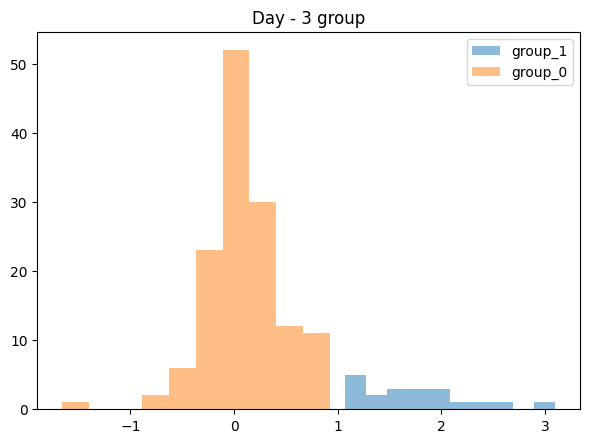

In [196]:
bins = numpy.linspace(-2, 3, 500)
pyplot.title("Day - 3 group")
pyplot.hist(day_3_group_1, alpha=0.5, label='group_1')
pyplot.hist(day_3_group_0, alpha=0.5, label='group_0')
pyplot.legend(loc='upper right')
pyplot.show()

# Analysis of the moderating effects of individual differences relating to stress, anxiety and impulsivity on habit formation as a function of training duration

In [197]:
stress_cols = ['ID','ANXIETY','BIS_attentional', 'BIS_motor', 'BIS_nonplanning',
               'TICS_WORY', 'TICS_EXWO', 'TICS_LACK',
               'TICS_PREPE', 'TICS_SOIS', 'TICS_SOOV',
               'TICS_SOTE', 'TICS_WODI', 'TICS_WOOV'
              ]

In [198]:
df_change[stress_cols].head()

,ID,ANXIETY,BIS_attentional,BIS_motor,BIS_nonplanning,TICS_WORY,TICS_EXWO,TICS_LACK,TICS_PREPE,TICS_SOIS,TICS_SOOV,TICS_SOTE,TICS_WODI,TICS_WOOV
0,52,-1.16791,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018
1,52,-1.16791,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018
2,52,-1.16791,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018
3,52,-1.16791,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018
4,52,-1.16791,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018


In [199]:
df_stress = df_change[stress_cols].copy().groupby(by='ID').mean().dropna()

In [200]:
df_stress.head()

,ANXIETY,BIS_attentional,BIS_motor,BIS_nonplanning,TICS_WORY,TICS_EXWO,TICS_LACK,TICS_PREPE,TICS_SOIS,TICS_SOOV,TICS_SOTE,TICS_WODI,TICS_WOOV
ID,,,,,,,,,,,,,
52,-1.167910,-1.215307,-0.589538,-1.070522,-1.484131,-1.324253,-1.732109,-1.941958,-1.573936,-1.619285,-1.228373,-1.611871,-1.475018
55,-0.747033,0.509115,-0.117907,1.099458,-0.261905,-0.574920,0.083475,-1.141456,-1.228147,0.398496,0.255911,-0.179097,-0.463435
58,0.620816,-0.968961,-0.589538,-0.636527,0.226985,-0.949586,1.596462,1.660300,0.673692,0.948800,1.104074,-0.322374,0.259125
59,0.199940,-1.215307,-1.296985,-1.504520,0.715875,-0.387586,0.688670,0.192713,0.155009,-0.518677,0.467952,0.394013,1.704244
63,-0.010499,0.509115,1.296983,2.401444,-1.239686,-0.012920,-1.126914,-1.008039,-1.573936,-0.702112,-1.228373,0.394013,-0.029899


In [201]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [202]:
chi2,p = calculate_bartlett_sphericity(df_stress)

In [203]:
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  1222.352790155817
p value :  5.6637185742220765e-205


In [204]:
kmo_vars,kmo_model = calculate_kmo(df_stress)

In [205]:
print(kmo_model)

0.8577710128246667


### Finding the optimal number of factors

In [206]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_stress.shape[1])
fa.fit(df_stress)

FactorAnalyzer(impute='drop', n_factors=13, rotation=None, rotation_kwargs={})

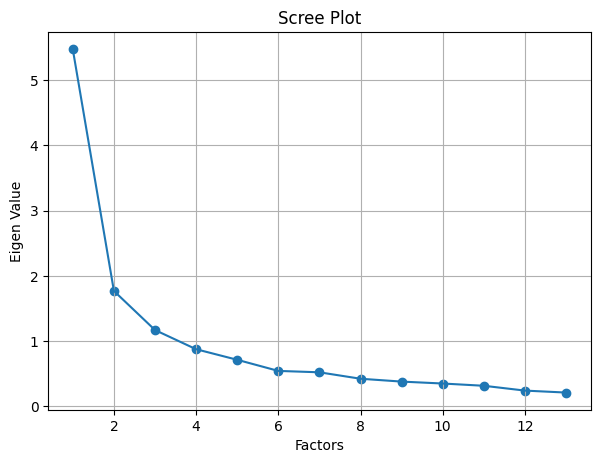

In [207]:
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df_stress.shape[1]+1),ev)
plt.plot(range(1,df_stress.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

#### The eigen value is reaching below 1 at 4. Thus the optimal number of factors would be 4

In [208]:
fa = FactorAnalyzer(n_factors=4,rotation='oblimin')
fa.fit(df_stress)

FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [209]:
factors = pd.DataFrame(fa.loadings_,index=df_stress.columns)
factors.columns = ['stress_social', 'stress_affect', 'stress_work', 'Impulsivity']

In [210]:
factors

,stress_social,stress_affect,stress_work,Impulsivity
ANXIETY,-0.015334,0.710130,0.089318,0.035810
BIS_attentional,-0.017171,0.308086,0.096047,0.391204
BIS_motor,0.115917,-0.040278,-0.035745,0.607055
BIS_nonplanning,-0.024949,-0.015750,0.015005,0.868134
TICS_WORY,0.099628,0.471418,0.338320,-0.050343
TICS_EXWO,-0.034770,0.131053,0.860503,0.082545
TICS_LACK,0.534779,0.201200,0.143271,-0.017146
TICS_PREPE,0.667262,0.142884,0.153468,-0.125632
TICS_SOIS,0.058653,0.805411,-0.079739,-0.035932
TICS_SOOV,0.885586,-0.098338,-0.052933,0.038772
